# Multiple Regression

Advantages of multiple regression:
- Several continuous predictors
- Parameters represent *marginal effect* of each predictor
    - The effect of the predictor when all other variables are held constant at the mean. To hold variables constant
- Lets us figure out **independent effects** of several **potentially correlated** variables

We can also include a *mix* of **continuous** and **categorical** variables, in which case we perform an **analysis of covariance**.

In [1]:
# The following code simulates data with two correlated predictor variables and fits a multiple-regression model.
set.seed(187)
x1 <- rnorm(200, 10, 2)
x2 <- 0.5*x1 + rnorm(200, 0, 4)
y <- 0.7*x1 + 2.2*x2 + rnorm(200, 0, 4)
m <- lm(y~x1+x2)
coefs <- summary(m)$coef

summary(m)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4276 -2.7240 -0.0065  2.7041  9.7580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48722    1.34745   0.362    0.718    
x1           0.64178    0.13246   4.845 2.56e-06 ***
x2           2.18446    0.06422  34.017  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.618 on 197 degrees of freedom
Multiple R-squared:  0.8683,	Adjusted R-squared:  0.8669 
F-statistic: 649.3 on 2 and 197 DF,  p-value: < 2.2e-16


In [2]:
# Print coefficients from model
coefs

             Estimate Std. Error    t value     Pr(>|t|)
(Intercept) 0.4872150 1.34744782  0.3615836 7.180507e-01
x1          0.6417832 0.13245620  4.8452488 2.555991e-06
x2          2.1844639 0.06421607 34.0174053 2.101837e-84

Coefficient of determination (called `Multiple R-squared` in R): $r^2=0.8683

- 86.83% of the variance in $y$ is explained by **residual variance**

Compute the variance in predicted values:

- Find variance $V$ in predicted values $\hat{y}$

$$
V(\hat{y})=Y(X\beta)
$$

- Divide by total variance $V$ of response variable $y$

$$
\frac{V(\hat{y})}{V(y)}=r^2
$$

In [3]:
# Generate r^2 (total variance explained by the model)
y_hat <- coefs[1,1] + coefs[2,1]*x1 + coefs[3,1]*x2
cat("Variance(y_hat): ", var(y_hat), "\n", sep = "")
cat("r^2: ", var(y_hat)/var(y), sep = "")

Variance(y_hat): 85.4221
r^2: 0.8682827

We can also compute the variance explained by **each** of the predictors $x_1$ and $x_2$.

Example: to compute the predicted values associated **only** with $x_1$, keep $x_2$ constant at its mean.
$$
\hat{y}_1 = intercept + slope_1 \times x_1 + slope_2 \times mean(x_2)
$$

In this case, 1.6% of the variance in the model is explained by predictor $x_1$ (see below).

In [4]:
# Variance explained by predictor x1
y_hat1 <- coefs[1,1] + coefs[2,1]*x1 + coefs[3,1]*mean(x2)
cat("Variance(y_hat1): ", var(y_hat1), "\n", sep = "")
cat("r^2 for predictor x1: ", var(y_hat1)/var(y), sep = "")

Variance(y_hat1): 1.608668
r^2 for predictor x1: 0.01635149

In [5]:
# Variance explained by predictor x1
y_hat2 <- coefs[1,1] + coefs[2,1]*mean(x1) + coefs[3,1]*x2
cat("Variance(y_hat2): ", var(y_hat2), "\n", sep = "")
cat("r^2 for predictor x2: ", var(y_hat2)/var(y), sep = "")

Variance(y_hat2): 79.29333
r^2 for predictor x2: 0.8059861

In [6]:
# Variance explained by x1 and x2
cat("Variance(y_hat): ", var(y_hat), "\n", sep = "")
cat("V(y_hat1) + V(y_hat2): ", var(y_hat1)+var(y_hat2), sep = "")

Variance(y_hat): 85.4221
V(y_hat1) + V(y_hat2): 80.902

The difference in the variance above is explained by
$$
Var(x+y)=Var(x)+Var(y)+2 \times Cov(x,y)
$$

In [7]:
print(var(y_hat1) + var(y_hat2) + 2*cov(y_hat1, y_hat2))

[1] 85.4221


$$
V(\hat{y})=\hat{\beta^T} \times S \hat{\beta}
$$

Where $\hat{\beta}$ is a vector of parameter estimates (slopes)

$S$ is the covariance matrix for the predictors

*Note that the first term is transposed*

In [8]:
t(coefs[2:3,1]) %*% cov(cbind(x1,x2)) %*% coefs[2:3,1]

        [,1]
[1,] 85.4221

The above approach is the most general. We can compute the variance explained by a **subset** of the predictors by specifying the correct vector of $\beta$ coefficients and the corresponding variance-covariance matrix.

Standardizing predictor variables: *z*-transform

$$
z = \frac{x-\bar{x}}{\sigma_x}
$$

Mean=0, SD=1

In [9]:
x1_z <- (x1 - mean(x1))/sd(x1)
x2_z <- (x2 - mean(x2))/sd(x2)
m <- lm(y ~ x1_z + x2_z)
summary(m)


Call:
lm(formula = y ~ x1_z + x2_z)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4276 -2.7240 -0.0065  2.7041  9.7580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.4090     0.2558  75.866  < 2e-16 ***
x1_z          1.2683     0.2618   4.845 2.56e-06 ***
x2_z          8.9047     0.2618  34.017  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.618 on 197 degrees of freedom
Multiple R-squared:  0.8683,	Adjusted R-squared:  0.8669 
F-statistic: 649.3 on 2 and 197 DF,  p-value: < 2.2e-16


Parameter estimates change, but not the model fit (eg $r^2$)

Mean-centering means that the intercept becomes the **mean** of $y$. It represents the value of $y$ when both predictors have a value of 0.

Also, the slope has units of standard deviations (change in $y$ per standard deviation change in predictor)

The data below is *log-transformed* aka *similarity mean-scaled*
- Slope units: means
    - Change in $y$ per % change in predictor
- Proportional slopes are called *elasticities*

In [10]:
x1_m <- (x1 - mean(x1))/mean(x1)
x2_m <- (x2 - mean(x2))/mean(x2)
summary(lm(y ~ x1_m + x2_m))


Call:
lm(formula = y ~ x1_m + x2_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4276 -2.7240 -0.0065  2.7041  9.7580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.4090     0.2558  75.866  < 2e-16 ***
x1_m          6.5254     1.3468   4.845 2.56e-06 ***
x2_m         12.3964     0.3644  34.017  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.618 on 197 degrees of freedom
Multiple R-squared:  0.8683,	Adjusted R-squared:  0.8669 
F-statistic: 649.3 on 2 and 197 DF,  p-value: < 2.2e-16


# Multicolinearity

When several predictors are correlated, it's hard to tease them apart to estimate their independent effects.

Rule of thumb: when *multicolinearity* > 0.6 or 0.7

*Variance inflation factors* can quantify multicolinearity

$$
VIF_i = \frac{1}{1-r_i^2}
$$

This is a measure for how closely correlated two variables are

In [11]:
# Essentially, calculate how correlated x1 and x2 are
m1 <- lm(x1~x2)
r2 <- summary(m1)$r.squared
1/(1-r2)

[1] 1.041714

# Exercise 1

Challenge: consider two main approaches to chosing among a large set of potential variables.

Statistical process: **backward selection of variables**
- Start with all potential predictors
- Sequentially drop non-significant terms until all terms are statistically significant

Since this might overemphasize statistical significance, you solve it by instead **starting from a **biological hypothesis that can be formulated as a statistical model**.

---

Exercise: try **both** approaches for the same dataset, see if we end up with the same model

Data: local abundance of two alpine plant species and environmental variables. Each row is a 25x25 cm plot. Each plot had the variables measured and individual plants counted.

Units:
- temp: C
- light intensity: % sunlight reaching through vegetation
- snow cover: cm
- altitude: m
- soil moisture: %

In [12]:
library(here)
library(tidyverse)

here() starts at /Users/otodreas/Lund/Courses/BIOS15/BIOS15-Coursework
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


In [95]:
plants <- read.csv(here("Exercises", "Exercise-4", "Data", "alpineplants.csv"))
d <- as_tibble(plants)
drop_na(d)
names(d)

 [1] "Carex.bigelowii"    "Thalictrum.alpinum" "mean_T_winter"      "max_T_winter"       "min_T_winter"      
 [6] "mean_T_summer"      "max_T_summer"       "min_T_summer"       "light"              "snow"              
[11] "soil_moist"         "altitude"          

### Biological hypothesis:


- mean_T_summer & max_T_summer look correlated
- winter temps look correlated

In [96]:
d_z <- d %>%
  mutate(across(-c(Carex.bigelowii, Thalictrum.alpinum), ~ (. - mean(.)) / sd(.)))

In [97]:
d_z_long <- d_z %>%
  pivot_longer(
    cols = c(Carex.bigelowii, Thalictrum.alpinum), names_to = "Species",
    values_to = "Species_Frequency"
  ) %>%
  pivot_longer(
    cols = -c(Species, Species_Frequency), names_to = "Variables",
    values_to = "Variable_Value"
  )

Warning message:
Removed 1344 rows containing missing values or values outside the scale range (`geom_point()`). 


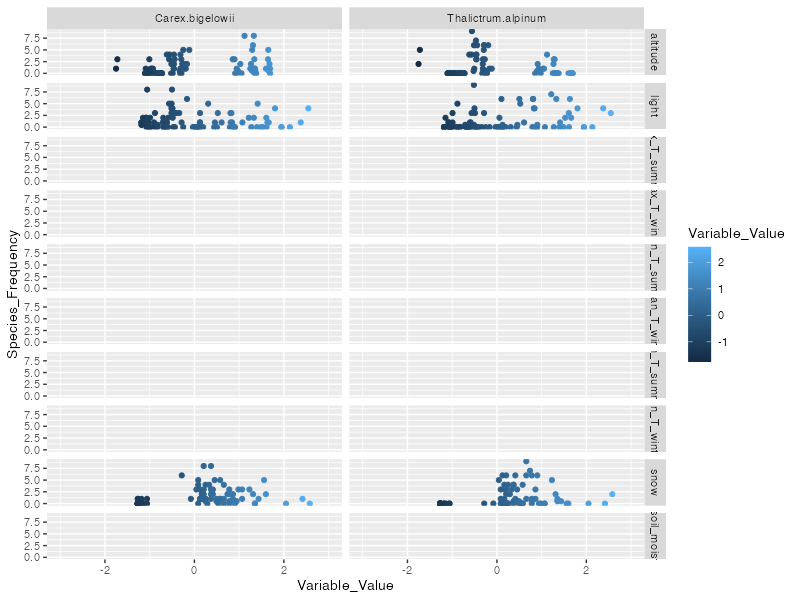

In [98]:
d_z_long %>%
  ggplot(aes(x = Variable_Value, y = Species_Frequency, colour = Variable_Value)) +
  geom_point() +
  xlim(-3, 3) +
  facet_grid(cols = vars(Species), rows = vars(Variables))

# Exercise 2

